# Book Recommendation System 

##  Business Objective :Generate the features from the dataset and use them to recommend the books accordingly to the users.

##  Import Libraries / Import Datasets

In [3]:

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [4]:
books=pd.read_csv('Books.csv',encoding='Latin1')
users=pd.read_csv('Users.csv',encoding='Latin1')
ratings=pd.read_csv('Ratings.csv',encoding='Latin1')

print("Books Data:    ", books.shape)
print("Users Data:    ", users.shape)
print("Books-ratings: ", ratings.shape)

Books Data:     (271360, 8)
Users Data:     (278858, 3)
Books-ratings:  (1149780, 3)


## Pre-Processing

### Books Dataset Pre-processing

In [5]:
print("Columns: ", list(books.columns))
books.head()

Columns:  ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
## Drop URL columns
books.drop(['Image-URL-S', 'Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [7]:
## Checking for null values
books.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-M            0
dtype: int64

In [8]:
books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...


In [9]:
books.loc[books['Publisher'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...


In [10]:
books.at[187689 ,'Book-Author'] = 'Other'

books.at[128890 ,'Publisher'] = 'Other'
books.at[129037 ,'Publisher'] = 'Other'


In [11]:
## Checking for null values
books.isnull().sum() 

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-M            0
dtype: int64

In [12]:
## Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [13]:
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...


In [14]:
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...


In [15]:
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = 2003
books.at[209538 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[209538 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [16]:
## Converting year of publication in Numbers
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [17]:
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [18]:
## Replacing Invalid years with max year
from collections import Counter
count = Counter(books['Year-Of-Publication'])
[k for k, v in count.items() if v == max(count.values())]

[2002]

In [19]:
books.loc[books['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [20]:
## Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)

In [21]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271360 non-null  object
 5   Image-URL-M          271360 non-null  object
dtypes: int32(1), object(5)
memory usage: 11.4+ MB


In [22]:
books.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,McGraw-Hill Humanities/Social Sciences/Languages,http://images.amazon.com/images/P/0767409752.0...


## Users Dataset Preprocessing

In [23]:
print("Columns: ", list(users.columns))
users.head()

Columns:  ['User-ID', 'Location', 'Age']


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [24]:
## Checking null values
print(users.isna().sum()) 

User-ID          0
Location         0
Age         110762
dtype: int64


In [25]:
## Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [26]:
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]

In [27]:
mean = round(required['Age'].mean())   
mean

35

In [28]:
users.loc[users['Age'] > 80, 'Age'] = mean    #outliers with age grater than 80 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = mean    #outliers with age less than 10 years are substitued with mean
users['Age'] = users['Age'].fillna(mean)      #filling null values with mean
users['Age'] = users['Age'].astype(int)       #changing Datatype to int

In [29]:
new= users["Location"].str.split(", ", n = 2, expand = True)

users["City"]= new[0]

users["State"]= new[1]

users["Country"]= new[2]


users.drop(columns =["Location"], inplace = True)

In [30]:
## Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  int32 
 2   City     278858 non-null  object
 3   State    278857 non-null  object
 4   Country  274281 non-null  object
dtypes: int32(1), int64(1), object(3)
memory usage: 9.6+ MB


In [31]:
users.head()

,User-ID,Age,City,State,Country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


## Ratings Dataset Pre-Processing

In [32]:
print("Columns: ", list(ratings.columns))
ratings.head()

Columns:  ['User-ID', 'ISBN', 'Book-Rating']


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [33]:
## Checking for null values
ratings.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [34]:
## checking all ratings are number or not
from pandas.api.types import is_numeric_dtype
print(is_numeric_dtype(ratings['Book-Rating']))

True


In [35]:
## checking User-ID contains only number or not
print(is_numeric_dtype(ratings['User-ID']))

True


In [36]:
## removing extra characters from ISBN (from ratings dataset) existing in books dataset
import re

bookISBN = books['ISBN'].tolist() 
reg = "[^A-Za-z0-9]" 
for index, row_Value in ratings.iterrows():
    z = re.search(reg, row_Value['ISBN'])    
    if z:
        f = re.sub(reg,"",row_Value['ISBN'])
        if f in bookISBN:
            ratings.at[index , 'ISBN'] = f

In [37]:
## Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

In [38]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149776 entries, 0 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149776 non-null  int64 
 1   ISBN         1149776 non-null  object
 2   Book-Rating  1149776 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [39]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


# Merging all three datasets

In [40]:
dataset = pd.merge(books, ratings, on='ISBN', how='inner')
dataset = pd.merge(dataset, users, on='User-ID', how='inner')
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031472 entries, 0 to 1031471
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031472 non-null  object
 1   Book-Title           1031472 non-null  object
 2   Book-Author          1031472 non-null  object
 3   Year-Of-Publication  1031472 non-null  int32 
 4   Publisher            1031472 non-null  object
 5   Image-URL-M          1031472 non-null  object
 6   User-ID              1031472 non-null  int64 
 7   Book-Rating          1031472 non-null  int64 
 8   Age                  1031472 non-null  int32 
 9   City                 1031472 non-null  object
 10  State                1031472 non-null  object
 11  Country              1007265 non-null  object
dtypes: int32(2), int64(2), object(8)
memory usage: 94.4+ MB


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,18,stockton,california,usa
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,35,timmins,ontario,canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,35,timmins,ontario,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,35,timmins,ontario,canada
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,35,timmins,ontario,canada


# Visualizations

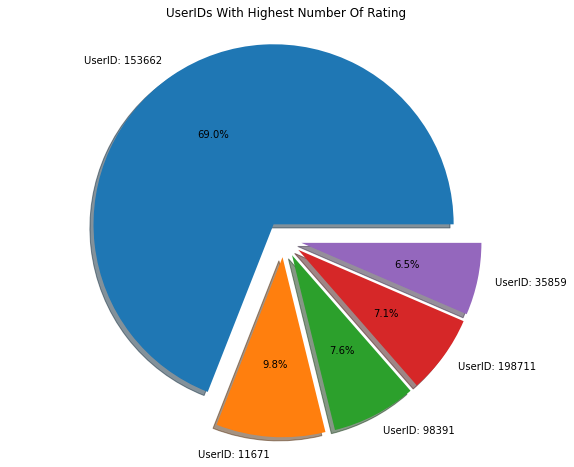

In [40]:
# Pie chart showing UserIDs With Highest Number Of Rating
my_dict=(dataset['Book-Rating'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'UserID: 153662','UserID: 11671','UserID: 98391','UserID: 198711','UserID: 35859'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1,0.1)

fig1 , ax1 = plt.subplots(figsize=(10,8))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("UserIDs With Highest Number Of Rating")
ax1.axis ('equal')

plt.show()

<AxesSubplot:xlabel='Age', ylabel='Density'>

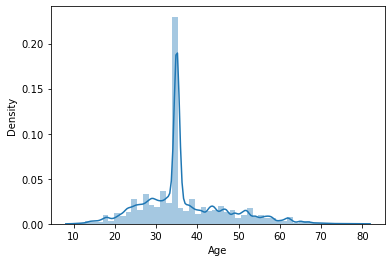

In [41]:
sns.distplot(dataset.Age)

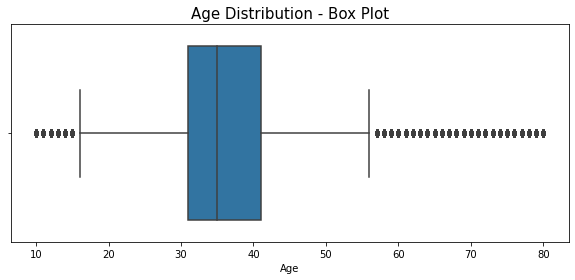

In [42]:
plt.figure(figsize=(10,4))
sns.boxplot(dataset['Age'])
plt.title('Age Distribution - Box Plot',size=15)
plt.show()

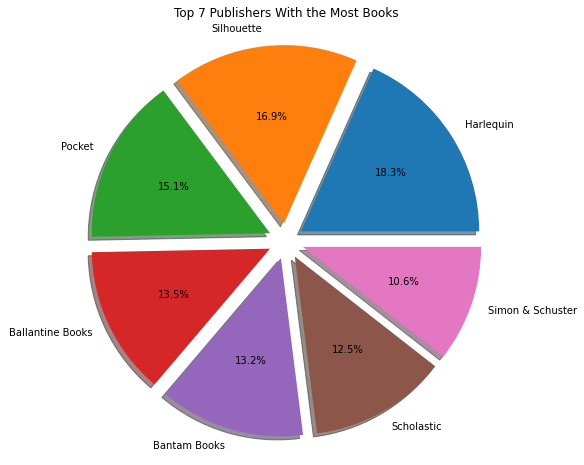

In [43]:
my_dict=(dataset['Publisher'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon & Schuster'
sizes = [count['count'].iloc[0],count['count'].iloc[1],count['count'].iloc[2],count['count'].iloc[3],count['count'].iloc[4],
         count['count'].iloc[5],count['count'].iloc[6]]
explode = (0.1, 0.1, 0.1, 0.1,0.1, 0.1,0.1 )
fig1 , ax1 = plt.subplots(figsize=(10,8))
ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Publishers With the Most Books")
ax1.axis ('equal')
plt.show()

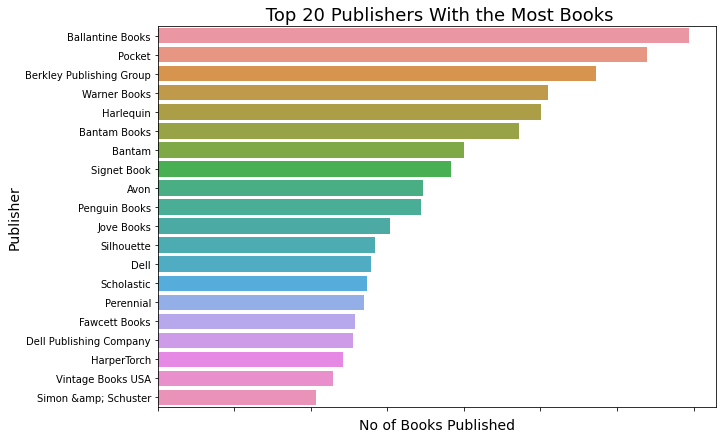

In [44]:
b = count.sort_values(by=['count'], ascending = False)
b = b.head(20)
x =['Harlequin','Silhouette','Pocket','Ballantine Books','Bantam Books','Scholastic','Simon &amp; Schuster']
y = [7537,4220,3905,3783,3646,3160,2971]
fig=plt.figure(figsize=(10,7))
ax = sns.barplot(x = 'count',y = 'c' , data = b)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90,horizontalalignment='center')
plt.xlabel("No of Books Published", size=14)
plt.ylabel("Publisher", size=14)
plt.title(" Top 20 Publishers With the Most Books", size=18)

plt.show()

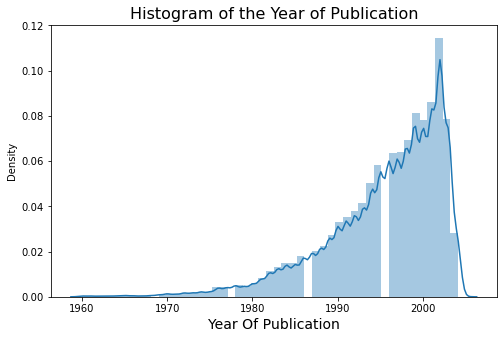

In [45]:
fig=plt.figure(figsize=(8,5))
y1 = dataset[dataset['Year-Of-Publication'] >= 1960]
y1 = y1[y1['Year-Of-Publication'] <= 2005]
sns.distplot(y1['Year-Of-Publication'])
plt.xlabel('Year Of Publication',size=14)
plt.title('Histogram of the Year of Publication',size=16)
plt.show()

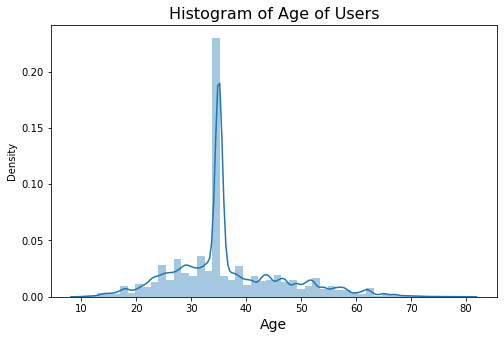

In [46]:
fig=plt.figure(figsize=(8,5))
sns.distplot(dataset['Age'])
plt.xlabel('Age',size=14)
plt.title('Histogram of Age of Users',size=16)
plt.show()

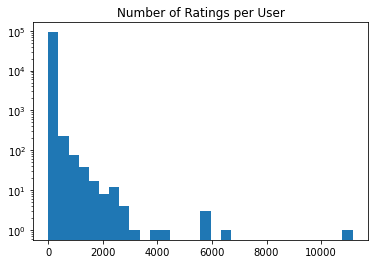

In [47]:
plt.hist(dataset.groupby(by='User-ID')['Book-Rating'].count(),
         bins=30, log=True)
plt.title('Number of Ratings per User')
plt.show()

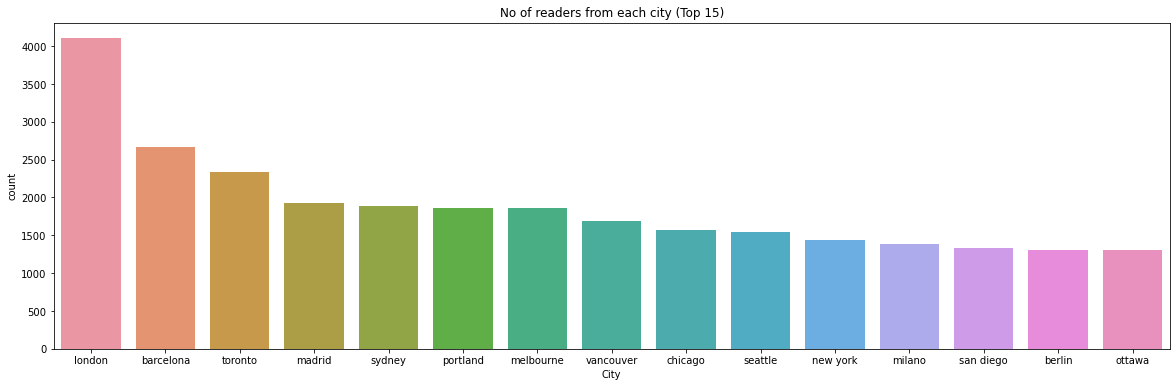

In [48]:

plt.figure(figsize=(20,6))
sns.countplot(x="City", data=users,order=users['City'].value_counts().index[0:15])
plt.title("No of readers from each city (Top 15)")
plt.show()

Text(0.5, 1.0, 'No of readers from each state (Top 15)')

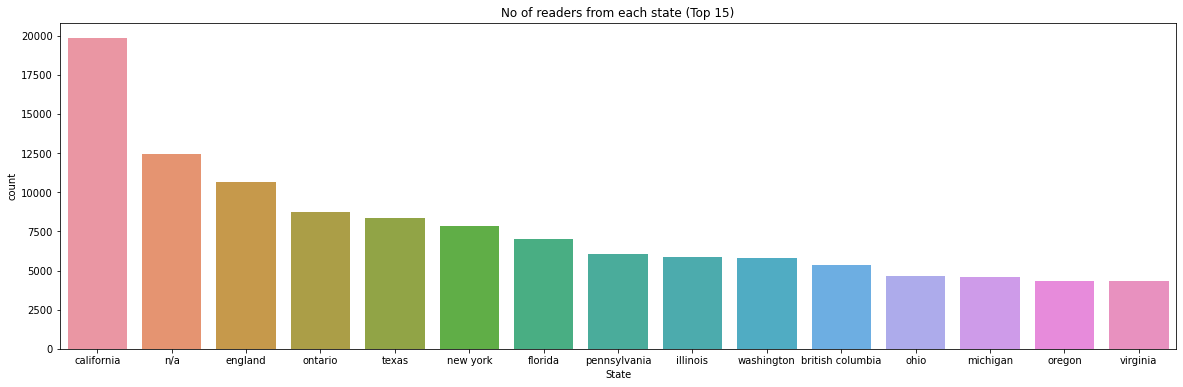

In [49]:
plt.figure(figsize=(20,6))
sns.countplot(x="State", data=users,order=users['State'].value_counts().index[0:15])
plt.title("No of readers from each state (Top 15)")

Text(0.5, 1.0, 'No of readers from each country (Top 10)')

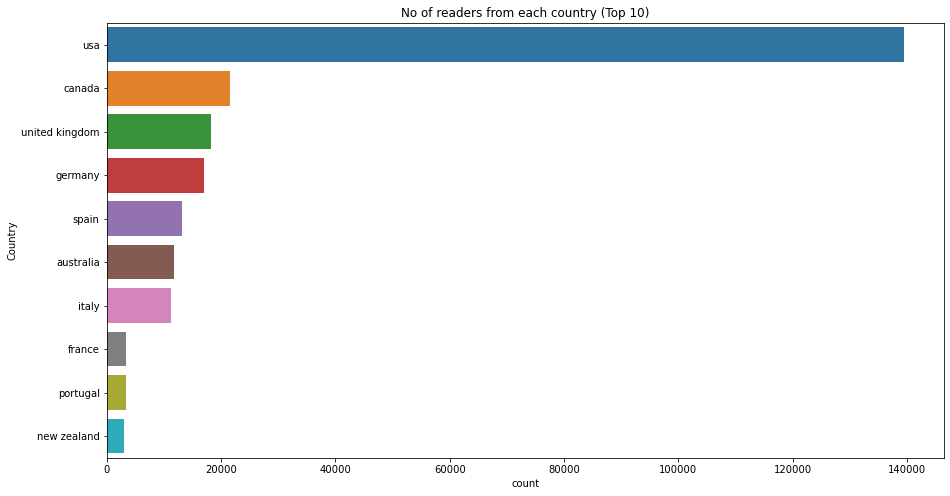

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(y="Country", data=users, order=users['Country'].value_counts().index[0:10])
plt.title("No of readers from each country (Top 10)")

Text(0.5, 1.0, 'Number of Ratings for a book (Top 15)')

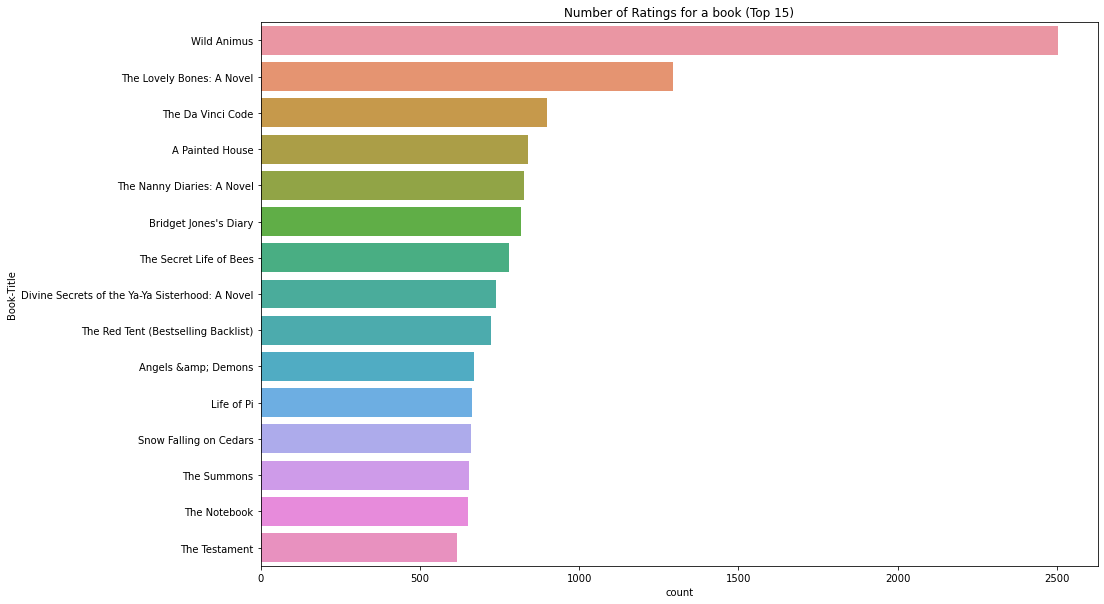

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(y="Book-Title", data=dataset, order=dataset['Book-Title'].value_counts().index[0:15])
plt.title("Number of Ratings for a book (Top 15)")

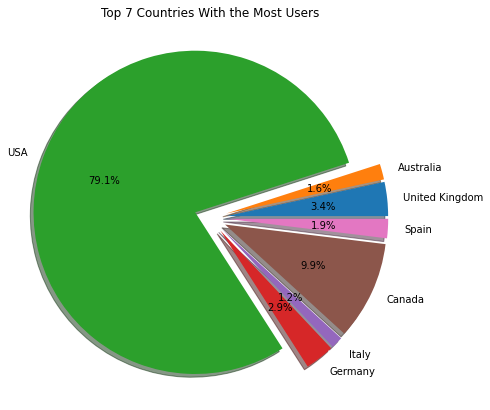

In [52]:
# Pie chart showing countries with most number of users 
my_dict=(dataset['Country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['c','count'])
a = count.sort_values(by=['count'], ascending = False)
a.head(7)
labels = 'United Kingdom','Australia','USA','Germany','Italy','Canada','Spain'
sizes = [count['count'].iloc[2],count['count'].iloc[5],count['count'].iloc[0],count['count'].iloc[3],count['count'].iloc[6],
         count['count'].iloc[1],count['count'].iloc[4]]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1 )

fig1 , ax1 = plt.subplots(figsize=(7,7))

ax1.pie(sizes,
        explode = explode,
        labels = labels,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.title("Top 7 Countries With the Most Users")
ax1.axis ('equal')

plt.show()

## Divide complete dataset on the basis of Implicit and Explicit ratings Dataset

In [41]:
## Explicit Ratings Dataset
dataset1 = dataset[dataset['Book-Rating'] != 0]
dataset1 = dataset1.reset_index(drop = True)
dataset1.shape

(384024, 12)

In [42]:
## Implicit Ratings Dataset
dataset2 = dataset[dataset['Book-Rating'] == 0]
dataset2 = dataset2.reset_index(drop = True)
dataset2.shape

(647448, 12)

In [55]:
dataset1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,35,timmins,ontario,canada
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,8,5,35,timmins,ontario,canada
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,8,5,35,timmins,ontario,canada
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,8,5,35,timmins,ontario,canada
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,8,6,35,timmins,ontario,canada
...,...,...,...,...,...,...,...,...,...,...,...,...
384019,8441407487,Sobre La Utilidad y Los Perjuicios de La Historia,Friedrich Wilhelm Nietzsche,2000,Edaf,http://images.amazon.com/images/P/8441407487.0...,246590,6,20,madrid,madrid,spain
384020,087004124X,Anthem,Ayn Rand,1966,Caxton Press,http://images.amazon.com/images/P/087004124X.0...,259589,8,19,venice,florida,usa
384021,158243123X,A Student of Weather,Elizabeth Hay,2001,Counterpoint Press,http://images.amazon.com/images/P/158243123X.0...,259591,8,39,tioga,pennsylvania,usa
384022,8485900057,Rimas y leyendas (ClÃÂ¡sicos Fraile ; 3),Gustavo Adolfo BÃÂ©cquer,1981,Ediciones Fraile,http://images.amazon.com/images/P/8485900057.0...,259614,10,22,madrid,madrid,spain


In [44]:
dataset1.to_csv('dataset1.csv')

Text(0.5, 1.0, 'Explicit Ratings')

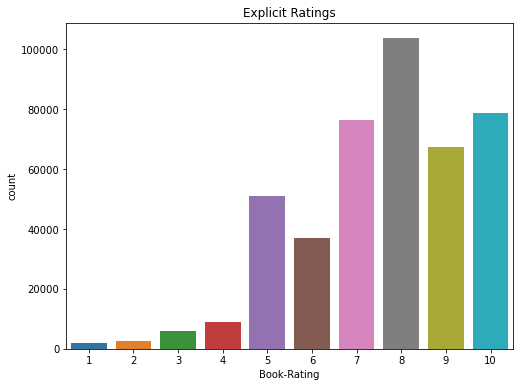

In [45]:
## Explicit Ratings
plt.figure(figsize=(8,6))
data = ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")

# Recommendation Systems

In [46]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

# Timeline
# The Firm
# A Painted House
# Life of Pi
# The Notebook


Enter a book name:  Life of Pi
Enter number of books to recommend: 5


## 1.Popularity based Recommendation

In [89]:
# popularity 
popularity = dataset1.groupby('Book-Title').count()['Book-Rating'].reset_index()
popularity.rename(columns={'Book-Rating':'Number of Ratings'},inplace=True)
popularity = popularity[popularity['Number of Ratings']>=200].sort_values('Number of Ratings',ascending=False).head(50)
popularity = pd.merge(popularity,dataset1[['Book-Title',"Book-Rating","Book-Author","User-ID",
       'Image-URL-M']])
popularity = popularity.drop_duplicates('Book-Title')
popularity.shape

(50, 6)

In [95]:
popularity.dtypes

Book-Title           object
Number of Ratings     int64
Book-Rating           int64
Book-Author          object
User-ID               int64
Image-URL-M          object
dtype: object

In [98]:
popularity




,Book-Title,Number of Ratings,Book-Rating,Book-Author,User-ID,Image-URL-M
0,The Lovely Bones: A Novel,707,5,Alice Sebold,11676,http://images.amazon.com/images/P/0316666343.0...
707,Wild Animus,581,6,Rich Shapero,11676,http://images.amazon.com/images/P/0971880107.0...
1288,The Da Vinci Code,495,9,Dan Brown,11676,http://images.amazon.com/images/P/0385504209.0...
1783,The Secret Life of Bees,413,7,Sue Monk Kidd,11676,http://images.amazon.com/images/P/0142001740.0...
2196,The Nanny Diaries: A Novel,393,6,Emma McLaughlin,11676,http://images.amazon.com/images/P/0312278586.0...
2589,The Red Tent (Bestselling Backlist),383,7,Anita Diamant,11400,http://images.amazon.com/images/P/0312195516.0...
2972,Bridget Jones's Diary,380,8,Helen Fielding,11676,http://images.amazon.com/images/P/014028009X.0...
3352,A Painted House,366,8,John Grisham,11676,http://images.amazon.com/images/P/044023722X.0...
3718,Life of Pi,337,6,Yann Martel,11400,http://images.amazon.com/images/P/0151008116.0...
4055,Harry Potter and the Chamber of Secrets (Book 2),326,8,J. K. Rowling,11676,http://images.amazon.com/images/P/0439064872.0...


In [115]:
import pickle
pickle.dump(popularity,open('popularity.pkl','wb'))

 ## 2.Content Based Filtering for same auther and same publisher

In [64]:
def printBook(k, n):
    z = k['Book-Title'].unique()
    for x in range(len(z)):
        print(z[x])
        if x >= n-1:
            break

In [65]:
x = dataset1.loc[dataset1['Book-Title'] == bookName, 'Book-Author'].unique()
y = dataset1.loc[dataset1['Book-Title'] == bookName, 'Publisher'].unique()

In [66]:
def get_books(dataframe, name, n):
    print('The author of ' + bookName +  '\n',x )
    au = dataframe['Book-Author'].unique()

    data = dataset1[dataset1['Book-Title'] != name]

    if au[0] in list(data['Book-Author'].unique()):
        k2 = data[data['Book-Author'] == au[0]]
    k2 = k2.sort_values(by=['Book-Rating'])
    printBook(k2, n)

    print('\n\nThe publisher of ' + bookName + '\n',y )
    au = dataframe['Publisher'].unique()

    if au[0] in list(data['Publisher'].unique()):
        k2 = pd.DataFrame(data[data['Publisher'] == au[0]])
    k2=k2.sort_values(by=['Book-Rating']) 
    printBook(k2, n)

In [67]:
if bookName in list(dataset1['Book-Title'].unique()):
    d = dataset1[dataset1['Book-Title'] == bookName]
    get_books(d, bookName, number)
else:
    print("Invalid Book Name!!")

Invalid Book Name!!


## 3. KNN Collaborative Based Filtering

In [68]:
x=dataset1.groupby('User-ID').count()['Book-Rating']>100
x.sum()

440

In [69]:
users_100=x[x].index
users_100

Int64Index([  2033,   2110,   2276,   4017,   4385,   5582,   6242,   6251,
              6543,   6575,
            ...
            269566, 270713, 271448, 271705, 273113, 274061, 274301, 275970,
            277427, 278418],
           dtype='int64', name='User-ID', length=440)

In [70]:
filtered_rating=dataset1[dataset1['User-ID'].isin(users_100)]
filtered_rating

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country
25,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8,35,n/a,n/a,n/a
26,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9,35,n/a,n/a,n/a
27,0671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,11676,8,35,n/a,n/a,n/a
28,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,11676,9,35,n/a,n/a,n/a
29,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,11676,8,35,n/a,n/a,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...
339289,0263827461,A Poor Relation (Historical Romance: Regency),Joanna Maitland,2001,Harlequin Mills &amp; Boon Ltd,http://images.amazon.com/images/P/0263827461.0...,163759,5,37,abertillery,wales,united kingdom
339290,0263816575,Mistress of Madderlea (Historical Romance: Reg...,Mary Nichols,1999,Harlequin Mills &amp; Boon Ltd,http://images.amazon.com/images/P/0263816575.0...,163759,5,37,abertillery,wales,united kingdom
339291,0440222974,A Fire in Heaven,Annee Carter,1998,Dell Publishing Company,http://images.amazon.com/images/P/0440222974.0...,163759,5,37,abertillery,wales,united kingdom
339292,0373059191,Mr. Easy (Man Of The Month) (Silhouette Desir...,Cait London,1995,Silhouette,http://images.amazon.com/images/P/0373059191.0...,163759,4,37,abertillery,wales,united kingdom


In [71]:
y=filtered_rating.groupby('Book-Title').count()['Book-Rating']>=5
famous_books=y[y].index
final_rating=filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]
final_rating

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,User-ID,Book-Rating,Age,City,State,Country
26,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9,35,n/a,n/a,n/a
28,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,11676,9,35,n/a,n/a,n/a
29,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,11676,8,35,n/a,n/a,n/a
32,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,11676,6,35,n/a,n/a,n/a
33,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,11676,10,35,n/a,n/a,n/a
...,...,...,...,...,...,...,...,...,...,...,...,...
309672,015668568X,"Old Possum's Book of Practical Cats, Illustrat...",T.S. Eliot,1982,Harvest Books,http://images.amazon.com/images/P/015668568X.0...,86947,10,71,san antonio,texas,usa
339175,0373243286,"Irish Rebel (Special Edition, 1328)",Nora Roberts,2000,Silhouette,http://images.amazon.com/images/P/0373243286.0...,163759,5,37,abertillery,wales,united kingdom
339177,0373483503,Macgregor Brides (Macgregors),Nora Roberts,1997,Silhouette,http://images.amazon.com/images/P/0373483503.0...,163759,5,37,abertillery,wales,united kingdom
339180,0373483899,The Macgregors: Alan - Grant (The Macgregors),Nora Roberts,1999,Silhouette,http://images.amazon.com/images/P/0373483899.0...,163759,5,37,abertillery,wales,united kingdom


In [72]:
final=final_rating.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')
final

User-ID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zombies of the Gene Pool,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zoya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
pd.set_option('Display.max_columns',None)

In [74]:
final=final.fillna(0)
final.sample(10)

User-ID,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,7286,7346,8067,8245,8681,10560,11676,11993,12538,12824,12982,13552,13850,14422,15408,15418,16634,16795,16966,17950,19085,21014,23768,23872,23902,25409,25601,25981,26535,26583,28591,28634,29259,30276,30511,30711,30735,30810,31315,31556,31826,32773,35433,35836,35857,35859,36554,36606,36836,36907,37644,37712,37950,38023,38273,38281,39281,39467,40889,40943,43246,43910,46398,47316,48025,48494,49889,51883,52199,52350,52584,52614,52917,53220,55187,55490,55492,56271,56399,56447,56554,56959,59172,60244,60337,60707,63714,63956,65258,66942,67840,68555,69078,69389,69697,70415,70594,70666,72352,73681,75591,75819,76151,76223,76499,76626,78553,78783,78834,78973,79441,81492,81560,83287,83637,83671,85526,85656,86189,86947,87141,87555,88283,88677,88693,88733,89602,91113,92652,92810,93047,93363,93629,94242,94347,94853,94951,95359,95932,96448,97754,97874,98391,98758,100459,100906,101209,101606,101851,102359,102647,102702,102967,104399,104636,105028,105517,105979,106007,107784,107951,109574,109901,109955,110483,110912,110934,110973,112001,113270,113519,114368,114868,114988,115002,115003,116599,117384,120565,122429,122793,123094,123608,123883,123981,125519,125774,126492,126736,127200,127359,128835,129074,129716,129851,130554,130571,132492,132836,133747,134434,135149,135265,136010,136139,136348,136382,138578,138844,140000,140358,141902,142524,143175,143253,143415,145449,146113,146348,147847,148199,148258,148744,148966,149907,149908,150979,153662,156150,156269,156467,157247,157273,158226,158295,158433,159506,160295,162052,162639,162738,163759,163761,163804,163973,164096,164323,164533,164828,164905,165308,165319,165758,166123,166596,168047,168245,170513,170634,171118,172030,172742,172888,173291,173415,174304,174892,177072,177432,177458,178522,179718,179978,180378,180651,181176,182085,182086,182993,183958,183995,184299,184532,185233,185384,187145,187256,187517,189139,189334,189835,189973,190708,190925,193458,193560,193898,194600,196077,196160,196502,197659,199416,200226,201290,203240,204864,205735,205943,206534,207782,208671,209516,210485,211426,212965,214786,216012,216444,216683,217106,217318,217740,218552,218608,219546,219683,222204,222296,223087,223501,224349,224525,224646,224764,225087,225199,225232,225595,225763,226965,227250,227447,227520,227705,229011,229329,229551,229741,230522,231210,232131,232945,233911,234359,234828,235105,235282,235935,236058,236283,236340,236757,236948,239584,239594,240144,240403,240543,240567,240568,241666,241980,242006,242083,242409,242465,244627,244685,245410,245827,246311,247429,247447,248718,249894,250405,250709,251394,251843,251844,252695,252820,254206,254465,254899,255489,257204,258152,258185,258534,261105,261829,262998,264031,264082,264321,264525,265115,265313,265889,266056,266226,268110,268300,268932,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Skipping Towards Gomorrah: The Seven Deadly Sins and the Pursuit of Happiness in America,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [75]:
from scipy.sparse import csr_matrix

# convert array values into matrix form

In [76]:
book_sparse=csr_matrix(final)

In [77]:
book_sparse

<2868x436 sparse matrix of type '<class 'numpy.float64'>'
	with 25858 stored elements in Compressed Sparse Row format>

In [78]:
from sklearn.neighbors import NearestNeighbors
model=NearestNeighbors(algorithm="brute")

In [79]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [81]:
distance,suggestion=model.kneighbors(final.iloc[237,:].values.reshape(1,-1),n_neighbors=6)

In [82]:
distance

array([[ 0.        , 36.78314832, 37.04051835, 37.25587202, 37.28270376,
        37.48332963]])

In [83]:
suggestion

array([[ 237, 2365,  543, 1210, 2138, 2347]], dtype=int64)

In [84]:
for i in range(len(suggestion)):
    print(final.index[suggestion[i]])

Index(['Balzac and the Little Chinese Seamstress : A Novel', 'The Mirror',
       'Daughter of Fortune: A Novel', 'Lost in Translation',
       'The Enchantment of Lily Dahl: A Novel',
       'The Magician's Nephew (Narnia)'],
      dtype='object', name='Book-Title')


In [85]:
final.index[3]

'16 Lighthouse Road'

In [86]:
books_name=final.index

In [87]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(books_name,open('books_name.pkl','wb'))
pickle.dump(dataset1,open('finaldata.pkl','wb'))
pickle.dump(final,open('final.pkl','wb'))

In [112]:
def recommend_book(book_name):
    book_id=np.where(final.index==book_name)[0][0]
    distance,suggestion=model.kneighbors(final.iloc[book_id,:].values.reshape(1,-1),n_neighbors=5)
    
    for i in range(len(suggestion)):
        books=final.index[suggestion[i]]
        for j in books :
            print(j)

In [113]:
np.where(final.index=="A Walk to Remember")[0][0]

97

In [114]:
recommend_book(bookName)

Life of Pi
Picture of Dorian Gray (Wordsworth Classics)
Last Breath
Galileo's Daughter: A Historical Memoir of Science, Faith, and Love
A Son of the Circus


In [62]:
import pickle

pickle.dump(popularity,open('popular.pkl','wb'))

In [91]:
pt = popularity.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [93]:
pt.fillna(0,inplace=True)

In [94]:
pt

User-ID,2977,11224,11400,11676,55492,67544,85526,110912,197659
Book-Title,,,,,,,,,
1st to Die: A Novel,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
A Painted House,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
A Time to Kill,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
Angels &amp; Demons,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
Bridget Jones's Diary,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
Divine Secrets of the Ya-Ya Sisterhood: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
Dreamcatcher,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
Fahrenheit 451,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0
Girl with a Pearl Earring,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
